# Students Grades for Portuguese Course. 
## Linear Regression model

Here in this project I'm going to explore the dataset of the stundents grades in a Portuguese Course which each row contains a lot of data about the stundent features for studying, his environment, his lifestyle and behavior.  

Then, I'll create a Regression Model to predict a stundent final grades by looking into his data.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Data Loading

As always, we have to check the content inside every column and for this, I'll leave the information related to the whole dataset inside the _readme.md_ in my [GitHub](https://github.com/EmanuelRodriguezBedeman/Python/blob/main/Machine%20Learning/Stundents%20Grades/readme.md)

In [2]:
# Data Loading and examination
data = pd.read_csv("student-por.csv", delimiter = ";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Data Exploration

In this step, we'll explore the data to get more information from it.

In [3]:
# Size of the dataset

print("Number of Rows: {}\nNumber of Columns: {}".format(data.shape[0], data.shape[1]))

Number of Rows: 649
Number of Columns: 33


In [4]:
# Showing a summary of the data:

print("Number of Rows: {}\nNumber of Columns: {}".format(data.shape[0], data.shape[1]))
data.describe()

Number of Rows: 649
Number of Columns: 33


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [5]:
# Re-cheking if the data have any NA (Not Available Data).

data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

By cheking the total rows of the data `(649)` and the row `count` in the summary table from above, we can see that matches it in all the columns, which means that there isn't any missing data in any column. 

Another way to do that, is by checking using the method `isnull()` on the data and add it. 

This method returns `True` if the data is missing (_NA_) in any row of each column and `False` if it isn't. And by remembering that the boolean `True` mathematically is equal 1, by adding all the True's, we get the total number of _NA_ per column. 

> `The False's doesn't count because their value is 0.`

As we see, none of this columns have any missing data or NA in it (`Nº Rows = count in every column / 0 in all the columns`), so we don't need to deal with it.

## Creating a subset of the data

Since there is a lot of features, I'll keep only those that are close related to the student like his/her grades, studytime, freetime and exam failures, for example.

In [6]:
# New Dataset with only choosen columns

data2 = data[["G1", "G2", "G3", "failures", "studytime", "freetime", "absences", "internet"]].copy()
data2.head()

,G1,G2,G3,failures,studytime,freetime,absences,internet
0,0,11,11,0,2,3,4,no
1,9,11,11,0,2,3,2,yes
2,12,13,12,0,2,3,6,yes
3,14,14,14,0,3,2,0,yes
4,11,13,13,0,2,3,0,no


## Exploring the Data

Even though this a step we already did previously, let's see it again to get a closer look at the subset we created:

In [7]:
# Columns information

print("Numerical columns:\n")

for column in data2.columns.tolist()[:-2]:
    print("-The column '{}', has values that goes from '{}' to '{}' and is '{}' type.\n"
      .format(column, data2[column].min(), data2[column].max(), data2[column].dtype))
    
print("Categorical column:\n")

print("-The column '{}' is a categorical column with values of 'yes' or 'no' and is {} type"
      .format(data2.columns.tolist()[-1], data2["internet"].dtype))

data2.describe()

Numerical columns:

-The column 'G1', has values that goes from '0' to '19' and is 'int64' type.

-The column 'G2', has values that goes from '0' to '19' and is 'int64' type.

-The column 'G3', has values that goes from '0' to '19' and is 'int64' type.

-The column 'failures', has values that goes from '0' to '3' and is 'int64' type.

-The column 'studytime', has values that goes from '1' to '4' and is 'int64' type.

-The column 'freetime', has values that goes from '1' to '5' and is 'int64' type.

Categorical column:

-The column 'internet' is a categorical column with values of 'yes' or 'no' and is object type


,G1,G2,G3,failures,studytime,freetime,absences
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,11.399076,11.570108,11.906009,0.221880,1.930663,3.180277,3.659476
std,2.745265,2.913639,3.230656,0.593235,0.829510,1.051093,4.640759
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,10.000000,10.000000,10.000000,0.000000,1.000000,3.000000,0.000000
50%,11.000000,11.000000,12.000000,0.000000,2.000000,3.000000,2.000000
75%,13.000000,13.000000,14.000000,0.000000,2.000000,4.000000,6.000000
max,19.000000,19.000000,19.000000,3.000000,4.000000,5.000000,32.000000


As we can see, all this variables are discrete because they are completly countable but not measurable with precision. 

As an **exception!**, the last column that choosed (`"internet"`) is a categorical column.
For now, let's keep this column in mind for later.

# Machine Learning

Now, let's see if we can create a Machine Learning model to do predictions of students grades.

## See the relation between variables:

Let's see the relationship between the grades (G1,G2,G3) and the time spent studying, which seems the most related variables:

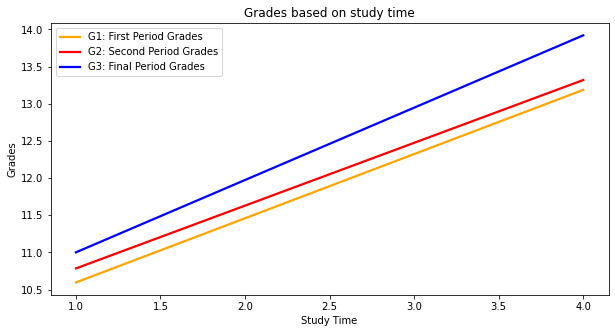

In [8]:
plt.figure(figsize=(10,5))

plt.title("Grades based on study time")
sns.regplot(x="studytime", y="G1", data=data2, color="orange",label="G1: First Period Grades", 
            scatter= False, ci= None)
sns.regplot(x="studytime", y="G2", data=data2, color="red", label="G2: Second Period Grades",
           scatter= False, ci= None)
sns.regplot(x="studytime", y="G3", data=data2, color="blue", label="G3: Final Period Grades",
            scatter= False, ci= None)
plt.xlabel("Study Time")
plt.ylabel("Grades")

plt.legend(loc="upper left")
plt.show()

As we can see there is a strong relationship between this variables, all of them are linear but the most straight one is the relation between the `Study Time` and `G3`. 

## Data Pre-Processing

I'll **shuffle** the data. Because, if there was any organization of the data that could lead to a situation where some of the data from the _training set_ is not available on the _test set_ (_or vice verse_) or in data that will be pass though this model, we can avoid that by this way.

In [9]:
data3 = shuffle(data2.copy(), random_state=0)

## Choosing the feature and the target

Now we'll **choose the features** (_predict variables_) that will be used as a feature and the target (_target variable_).

- In this case I'll try to predict the final grades `G3` by using only the `study time` column because as we saw, there is a strong relationship between this two variables. **A linear relation**.

In [10]:
# Predict variable (X) and target variable (Y)

X = data3["studytime"]
Y = data3["G3"]

## Making the Training and Test Sets
<br>
We split the data into two diffent parts: 


- **_Training Set_**: It's the part of the data that will be used to create and train the model.


- **_Test Set_**: It's the part of the data that will be used to test the model, to know how good actually is.

Both will have data from predict variables and the target variable, but in different proportion. 

The training set will have 80% of the total data, and the test set will have 20%.

In [11]:
# Dividing the data in training and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

# Creating the model

Now that our data is ready, let's create the model with the **_training data_**, make predictions and validate our model using the **_test data_**.

In [12]:
# Creating the Linear model

lm = LinearRegression()
lm.fit(X_train.values.reshape(-1, 1), Y_train) # Training the model

LinearRegression()

In [13]:
# Making predictions with the model that we builded

predictions = lm.predict(X_test.values.reshape(-1, 1)) # Predicting the target with test data
predictions[:5] # Sample of predictions

array([11.1633364 , 12.01918022, 12.01918022, 11.1633364 , 12.01918022])

Below here, I create a Data Frame / Data Set with the data used to create the predictions and the "real" predictions for that data.

I usually do this just to see the actual data and the predicted data by myself.

In [14]:
lm_results = pd.DataFrame({
    "Study_Time": X_test,
    "G3": Y_test,
    "Predicted_G3" : predictions
})

lm_results.head()

,Study_Time,G3,Predicted_G3
19,1,12,11.163336
462,2,14,12.019180
124,2,11,12.019180
177,1,8,11.163336
215,2,12,12.019180


# Validating the model

There is different ways.

* We can "manually" see it by comparing the values of the real data and the predicted data, but clearly this method isn't the best one.


* With `.score()` we are calculating the value of $R^2$ (also known as [**Coefficient of Determination**](https://en.wikipedia.org/wiki/Coefficient_of_determination)), which you can understand it as "_accuracy_" of the model. It's a number between 0 and 1 and, as it gets closer to 1, it means that the model is performing better. (_but not always_).


* Also we can determinate how accurate are the predictions made with the model, by calculating the difference between the actual value of the target variable and the value of the prediction on the test set to see how much is the difference (**the error**) between them.

    After that, we could calculate the **Mean** for those **errors** in **absolute values**. What is called "**_Mean Absolute Error_**" (**_MAE_**) and Scikit-learn offers a function to do this with the same name "`mean_absolute_error`()". 

    [For another example of MAE visit this link](https://www.kaggle.com/dansbecker/model-validation)

In [15]:
# This the result of R squared, take it like the accuracy of our model.

print("The model accuracy is: " + str(round(lm.score(X_test.values.reshape(-1, 1), Y_test)*100,2)) + "%")

The model accuracy is: 9.47%


In [16]:
# Calculate the Mean Absolute Error

print("The MAE of the model is:",mean_absolute_error(Y_test, predictions))

The MAE of the model is: 2.2899115416671467


By watching at the dataframe that we created, we see that sometimes the predictions (**Predicted_G3**) are close, but somer others are REALLY far from the actual data (**G3**).

- For example, we see that for a **G3** value of `6` the **Prediction** was `~11`, something around `5~` points of errors. Which for grades is a lot.

- The **accuracy** $(R^2)$ of our model is around `9.47%`, which is really poor.

- The **MAE** is `~2.3` which seems not to be big, but for grades is really a big range of mistake.

Let's try again the [algorithm](https://en.wikipedia.org/wiki/Algorithm) that I created but without shuffling the data:

In [17]:
# Algorithm

# Predict variable (X) and target variable (Y)
X = data2["studytime"]
Y = data2["G3"]

# Dividing the data in training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Creating the Linear model
lm = LinearRegression()
lm.fit(X_train.values.reshape(-1, 1), Y_train)

# Creating predictions with the model
predictions = lm.predict(X_test.values.reshape(-1, 1))
predictions[:5]

# Creating the DF with the data used, the actual objective data and the predicted data
lm_results = pd.DataFrame({
    "Study_Time": X_test,
    "Grades_1": Y_test,
    "Grades_predicted" : predictions
})

print("The model accuracy is: " + str(round(lm.score(X_test.values.reshape(-1, 1), Y_test)*100,2)) + "%")
print("The MAE of the model is:",mean_absolute_error(Y_test, predictions))

lm_results.head()

The model accuracy is: 9.67%
The MAE of the model is: 1.8823476539251052


,Study_Time,Grades_1,Grades_predicted
532,2,8,11.918206
375,3,15,12.855361
306,2,16,11.918206
625,1,10,10.981052
480,1,10,10.981052


Once again, we take a look into the data and we can see that this time for a value of `8` the prediction was `12~`, like `5~` points of error.

And the "accuracy" of the model using data without shuffling is ~10% which is still poor.

# Multiple Linear Regression

For the last example we only used one feature to make the model, but if we use more variables that could be related to our objective, maybe we could create better models.

For now, the equation that we created for the model, looks like this:

$y = \beta \cdot X + \alpha$

But if we add more variables it will look like this: 

$y = \beta_1 \cdot X_1 + \alpha + \beta_2 \cdot X_2 + \beta_n \cdot X_n ...$

This equation could (probably) take us closer to a better prediction model (**predicts closer values to $y$**)

But could also happend that, if we add more variables to the model it can also be worst (**predicts more distant values from $y$**)

This problem is called **_Multicollinearity Problem_** and mainly is produced because there is a strong correlation between the input variables (**_the features_**).

## Linear Regression calculated values

Before going deeper into the multiple Linear Regression, let's check how our last Linear Model Equation was composed:

In [18]:
# To get the alfa of the model (also called intercept):

print("The alpha of the last model is:", lm.intercept_)

The alpha of the last model is: 10.043897047213012


In [19]:
# To get the beta of the model (also called coeficient):

print("The Beta of the last model is:", lm.coef_)

The Beta of the last model is: [0.93715459]


So, the equation of our last linear model to predict a student final grade would look like this:

$Final\hspace{1mm}Grade = 0.94 \cdot (study\hspace{2.5mm}time) + 10 $

## Correlations between variables

Now let's check the correlation of the variables, so we see which variables (from the subset that we created) are better for predicting the final grades (`"G3"`).

,G1,G2,G3,failures,studytime,freetime,absences
G1,1.000000,0.864982,0.826387,-0.384210,0.260875,-0.094497,-0.147149
G2,0.864982,1.000000,0.918548,-0.385782,0.240498,-0.106678,-0.124745
G3,0.826387,0.918548,1.000000,-0.393316,0.249789,-0.122705,-0.091379
failures,-0.384210,-0.385782,-0.393316,1.000000,-0.147441,0.108995,0.122779
studytime,0.260875,0.240498,0.249789,-0.147441,1.000000,-0.068829,-0.118389
freetime,-0.094497,-0.106678,-0.122705,0.108995,-0.068829,1.000000,-0.018716
absences,-0.147149,-0.124745,-0.091379,0.122779,-0.118389,-0.018716,1.000000


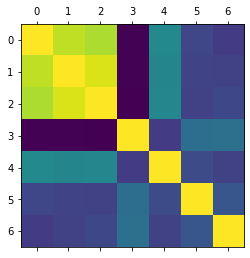

In [20]:
# Correlation between the variables:

plt.matshow(data2.corr())
data2.corr()

Let's focus on the **column "G3"** or **column 2** in the heatmap.

As we can see most most of the variables have a strong correlation with this one, except for the variable `"failures"` which also have a very low correlation with the other variables.

This correlation could be positive or negative. 

- **Positive correlation**: This means that as the variable increases, the related variable also increases, for example:
$$\uparrow Study \hspace{1mm} Time\hspace{1mm} \uparrow Final Grades$$

- **Negative correlation**: This means that as the variable increases, the related variable decreases, for example:

$$\uparrow Failures\hspace{1mm} \downarrow \hspace{1mm} Final Grades$$

## Multicollinearity Problem

This problem is caused because there is a strong correlation between the input variables (features) for a target variable, meaning because of this correlations their values for a target variable change because of this.

_For example_, looking again at the correlations table, we can see that for the features **G1** and **G2**...

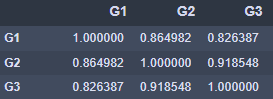

> _Later we'll use this ones to predict final grades, because of their strong correlation with G3._

There is really strong correlation ($~86$%), almost 1. It's like they were exactly the same variables.

> _That's why in other cells we a 1 in the correlation because if you see the correlation between yourself and yourself, that correlation will be 100% (1)_ because you are exactly the same.

And since this correlation is positive it means that for a value of G1, G2 increases and that increment reflects on the variable target (G3) more above than it has to be.

## Variance Inflation Factor (VIF)

We can use this technique to know if the correlation between this the variable has is so strong that it should be eliminated from the model because is making it worst.

To use it, we must introduce the variable that's giving problems by the others variables and calculate the [VIF](https://en.wikipedia.org/wiki/Variance_inflation_factor):

<center><font size=6> $VIF = 1/(1 - R^2)$ </font></center>

#### What to do values if the values of VIF are:
* VIF = 1 : The variables or not correlated and they can be used.
* VIF < 5 : The variables have a moderate correlation and they can stay in the model.
* VIF > 5 : The variables have a highly correlation and must be eliminated from the model.

To make things easier I made a function to calculate it faster:

In [21]:
# Function to calculate VIF

def VIF(data,feature_1, feature_2, plus_feature):
    lm_n = smf.ols(formula= feature_1 + "~" + feature_2 + "+"  + plus_feature, data = data2).fit()
    rsquared_n = lm_n.rsquared
    VIF = 1/(1-rsquared_n)
    return VIF

In [22]:
# Calculate VIF for G1 by G2 and studytime

VIF(data2 ,"G1","G2", "studytime")

4.018609444902038

In [23]:
# Calculate VIF for G2 by G1 and studytime

VIF(data2 ,"G2", "G1", "studytime")

3.975032131494133

In [24]:
# Calculate VIF for studytime by G1 and G2

VIF(data2 ,"studytime", "G1", "G2")

1.074034491079331

In [25]:
# Calculate VIF for studytime by G2 and G1

VIF(data2 ,"studytime", "G2", "G1")

1.074034491079331

As we can see, and following the recomendation left above, this variables are related but not enough to corrupt or create a bad model so they can stay in the model.

## Function to calculate Linear Models faster:

Since I'm going to create multiple linear models, I'll create a function to make it easier and faster.

In [26]:
# Function to create Linear Models with Scikit-Learn

def linear_model_creator(df,feature_variables, target_variable, test_size = 0.2):
    # Algorithm
    
    # Predict variable (X) and target variable (Y)
    X = np.array(df[feature_variables])
    Y = np.array(df[target_variable])

    # Dividing the data in training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = 0)
        
    # Creating the Linear model
    lm = LinearRegression()
    lm.fit(X_train, Y_train)

    # Creating predictions with the model
    predictions = lm.predict(X_test)

    # Creating the DF with the used features, the target variable and the predicted data
    dictionary = {}

    for feature in feature_variables:
        dictionary[feature] = X_test[:, feature_variables.index(feature)]

    lm_results = pd.DataFrame.from_dict(dictionary)
    lm_results["Y_target"] = Y_test
    lm_results["Y_predicted"] = predictions
    
    print("Target:",target_variable)
    print("Features:", feature_variables)
    print("The accuracy (R²) of the Model is:", lm.score(X_test, Y_test))
    print("The MAE of the Model is:", mean_absolute_error(Y_test, predictions))
    print("The intercept (alpha) is:", lm.intercept_)
    print("The coeficients (betas) are: ", lm.coef_)
    
    return lm_results.head()

Now thanks to this function, we can create models faster trying any combination of features. 

Let's start with the most correlated variables (G1, G2 and Studytime) to predict G3:

In [27]:
# Linear Model using the most correlated features with G3 ("G1", "G2" and "studytime")

linear_model_creator(data2, ["G1", "G2", "studytime"], "G3")

Target: G3
Features: ['G1', 'G2', 'studytime']
The accuracy (R²) of the Model is: 0.8622120910268747
The MAE of the Model is: 0.7633374334655946
The intercept (alpha) is: -0.5734796611477293
The coeficients (betas) are:  [0.1490361  0.91634348 0.08643885]


,G1,G2,studytime,Y_target,Y_predicted
0,9,7,2,8,7.355127
1,14,14,3,15,14.601151
2,15,16,2,16,16.496435
3,10,10,1,10,10.166755
4,9,9,1,10,9.101375


As we can see, this model performed much better than using only 1 feature for the model, let's see if using more variables improves even more the model:

In [28]:
# Linear Model using all the features

linear_model_creator(data2, ["G1", "G2", "studytime","freetime","failures","absences"], "G3")

Target: G3
Features: ['G1', 'G2', 'studytime', 'freetime', 'failures', 'absences']
The accuracy (R²) of the Model is: 0.8637959119068196
The MAE of the Model is: 0.7535429932702663
The intercept (alpha) is: -0.22804807205482724
The coeficients (betas) are:  [ 0.14309273  0.90338475  0.08790417 -0.05277017 -0.23678836  0.02437577]


,G1,G2,studytime,freetime,failures,absences,Y_target,Y_predicted
0,9,7,2,2,0,2,8,7.502499
1,14,14,3,3,0,0,15,14.528039
2,15,16,2,2,0,6,16,16.589022
3,10,10,1,2,0,0,10,10.219091
4,9,9,1,4,1,0,10,8.830284


We can see that the $R^2$ of the Model improved only `~0.0016`.

As we saw above, we should remove the variable `failures` because it has a low correlation with G3 and the other variables. Let's do a model without this variable:

In [29]:
# Linear Model using all the features except failures

linear_model_creator(data2, ["G1", "G2", "studytime","freetime","absences"], "G3")

Target: G3
Features: ['G1', 'G2', 'studytime', 'freetime', 'absences']
The accuracy (R²) of the Model is: 0.8642576086396674
The MAE of the Model is: 0.7536635779652209
The intercept (alpha) is: -0.4972864149873093
The coeficients (betas) are:  [ 0.15366661  0.91327016  0.09428168 -0.06077732  0.02214515]


,G1,G2,studytime,freetime,absences,Y_target,Y_predicted
0,9,7,2,2,2,8,7.389903
1,14,14,3,3,0,15,14.540341
2,15,16,2,2,6,16,16.619915
3,10,10,1,2,0,10,10.144808
4,9,9,1,4,0,10,8.956317


As we can see, all this models performed better much better to predict `G3` than just using `studytime` as a feature.

And the most accurate and almost with the lowest MAE is the model with features: `"G1", "G2", "studytime","freetime","absences"` but this difference is almost negligible.

# Linear Regression Modeling with categorical variables

There is a lot of ways to use this kind of variables in a Machine Learning model. You can find the three most used ways in [here](https://www.kaggle.com/alexisbcook/categorical-variables)

On this proyect I'll create dummy variables (they work exactly as One-Hot Encoding example from Kaggle).

The cateogircal variables could also work some kind of classification, and for this model to interprete it like, I'll add 2 more columns.

One that will have values equal to 1 if the student have access to internet or 0 if not.

The other column, on the contrary, will have values equal to 1 if the user doesn't have access to internet or 0 if the student have access to it.

## Final grades by study time and internet access

Before going deeper into this, I'll take a look of how the study time and the final grades are related to internet access.



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


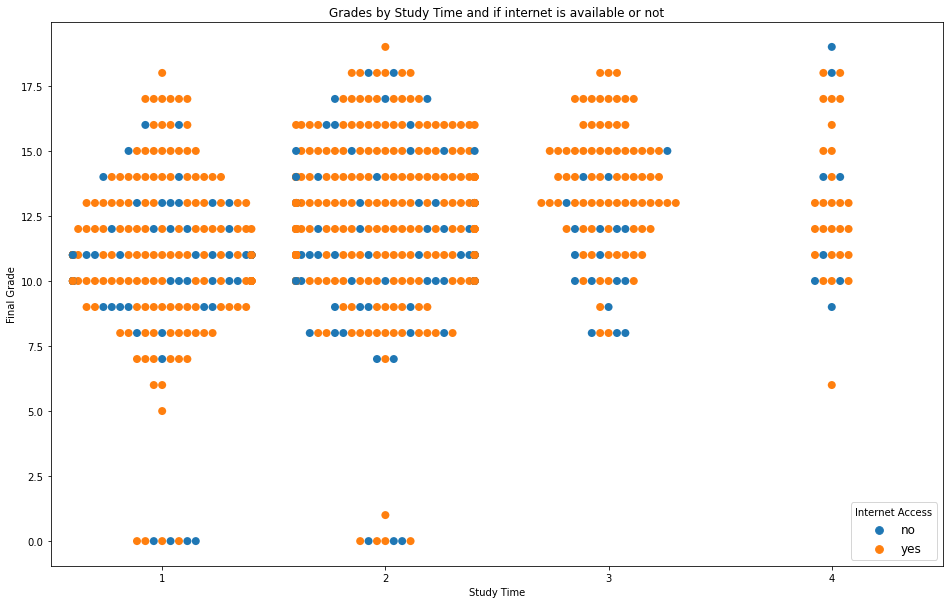

yes    498
no     151
Name: internet, dtype: int64

In [30]:
# Scatter plot to see the grades by study time and the internet access

plt.figure(figsize=(16,10))

plt.title("Grades by Study Time and if internet is available or not")
sns.swarmplot(x="studytime", y="G3", hue="internet", data=data2, size=8)
plt.xlabel("Study Time")
plt.ylabel("Final Grade")

plt.legend(loc="lower right", title="Internet Access", prop={"size":12})
plt.show()

data2.internet.value_counts()

**Ignore the warning** that says that some points can't be placed, we can still get the big picture.

On this swarmplot, we can see that most of the students have internet access and regardless if they have Internet Access or not, there is chances of getting bad (<10 points) or good grades (>10 points).

Considering this, we see that most of the students who has internet access have more chances on getting more than 12.5 points on their final grades with lesser studying hours, than without internet.

## Data Pre-Processing for dummy variables

First, I'll create the dummy variables which will contain information as explain above.

In [31]:
# Creating the dummy variables for internet

dummy_internet = pd.get_dummies(data2["internet"], prefix = "Internet")
dummy_internet.head()

,Internet_no,Internet_yes
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


Now I'll add this 2 columns into the dataframe:

In [32]:
# Creating a DF with the dummies inside

data3 = data2.join(dummy_internet)
column_names = data3.columns.values.tolist()
data3.head()

,G1,G2,G3,failures,studytime,freetime,absences,internet,Internet_no,Internet_yes
0,0,11,11,0,2,3,4,no,1,0
1,9,11,11,0,2,3,2,yes,0,1
2,12,13,12,0,2,3,6,yes,0,1
3,14,14,14,0,3,2,0,yes,0,1
4,11,13,13,0,2,3,0,no,1,0


## Linear Model with Dummies inside

We will choose only use for the training data the columns that are not the target variable, the column with strings on it (that's why we turned that column into a dummy, this was we can operate with it) and drop the column of failures, because as we saw, the model performed worst with this column.

In [33]:
# Selecting the features from the new data frame

feature_variables = data3.drop(["G3","internet","failures"], axis= 1).columns.values.tolist()
feature_variables

['G1',
 'G2',
 'studytime',
 'freetime',
 'absences',
 'Internet_no',
 'Internet_yes']

In here, we will create the Model using the features as shown above:

In [34]:
# Creates a linear model with the dummies variables

linear_model_creator(data3, feature_variables, "G3")

Target: G3
Features: ['G1', 'G2', 'studytime', 'freetime', 'absences', 'Internet_no', 'Internet_yes']
The accuracy (R²) of the Model is: 0.8637145603442766
The MAE of the Model is: 0.7545408871546837
The intercept (alpha) is: -0.5018243162799418
The coeficients (betas) are:  [ 0.15381336  0.91372356  0.09439068 -0.06020052  0.0223225   0.00953246
 -0.00953246]


,G1,G2,studytime,freetime,absences,Internet_no,Internet_yes,Y_target,Y_predicted
0,9,7,2,2,2,0,1,8,7.382054
1,14,14,3,3,0,0,1,15,14.536731
2,15,16,2,2,6,0,1,16,16.617736
3,10,10,1,2,0,0,1,10,10.138002
4,9,9,1,4,0,0,1,10,8.950064


Target: G3
Features: ['G1', 'G2', 'studytime', 'freetime', 'absences']
The accuracy (R²) of the Model is: 0.8642576086396674
The MAE of the Model is: 0.7536635779652209
The intercept (alpha) is: -0.4972864149873093
The coeficients (betas) are:  [ 0.15366661  0.91327016  0.09428168 -0.06077732  0.02214515]

As we saw, this last model doesn't perform better than the model without the dummy variables.

And, the best model for this case is the last one we did before the model with the dummy:

In [40]:
data2.head()

,G1,G2,G3,failures,studytime,freetime,absences
0,0,11,11,0,2,3,4
1,9,11,11,0,2,3,2
2,12,13,12,0,2,3,6
3,14,14,14,0,3,2,0
4,11,13,13,0,2,3,0


In [78]:
 # Algorithm

# data2.drop("internet", inplace=True, axis=1)
# data2.head()    
    
best_features = ["G1", "G2", "studytime","freetime","absences"]
target = "G3"

# Predict variable (X) and target variable (Y)
X = np.array(data2[best_features])
Y = np.array(data2[target])

# Dividing the data in training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
        
# Creating the Linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

# Creating predictions with the model
predictions = lm.predict(X_test)

# Creating the DF with the used features, the target variable and the predicted data
dictionary = {}

for feature in best_features:
    dictionary[feature] = X_test[:, best_features.index(feature)]

lm_results = pd.DataFrame.from_dict(dictionary)
lm_results["Y_target"] = Y_test
lm_results["Y_predicted"] = predictions
    
print("-Target:", target)
print("-Features:", best_features)
print("-The accuracy (R²) of the Model is:", lm.score(X_test, Y_test))
print("-The MAE of the Model is:", mean_absolute_error(Y_test, predictions))
print("\n-The intercept (alpha) is:", lm.intercept_)
print("-The coeficients (betas) for each feature are:\n")
[print(conjunto) for conjunto in list(zip(best_features, lm.coef_))]

lm_results.head()

-Target: G3
-Features: ['G1', 'G2', 'studytime', 'freetime', 'absences']
-The accuracy (R²) of the Model is: 0.8642576086396674
-The MAE of the Model is: 0.7536635779652209

-The intercept (alpha) is: -0.4972864149873093
-The coeficients (betas) for each feature are:

('G1', 0.1536666066916453)
('G2', 0.9132701600171489)
('studytime', 0.09428167841963961)
('freetime', -0.06077731633661796)
('absences', 0.02214515044888553)


,G1,G2,studytime,freetime,absences,Y_target,Y_predicted
0,9,7,2,2,2,8,7.389903
1,14,14,3,3,0,15,14.540341
2,15,16,2,2,6,16,16.619915
3,10,10,1,2,0,10,10.144808
4,9,9,1,4,0,10,8.956317


And with this last show of the model, I end this project.

Hope you like it and enjoyed viewing as much as I did.

If you have any suggestions please let me know!